In [16]:
#각각의 요소별 생존 확률을 구한다.
#각 성별에 대한 생존 확률
#각 클래스에 대한 생존 확률

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10


In [2]:
#데이터 읽기
df = pd.read_csv('train.csv')
#데이터 프레임의 요약 정보 결측치 확인 #나이 177개 결측치, Cabin 687개 결측치, Embarked 2개 결측치
print(df.isnull().sum())
df.info() #dtypes: float64(2), int64(5), object(5)
print(df.head())



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
   

In [3]:
#데이터 프레임 출력
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
# 전체 승객 수
PassengerId = df['PassengerId'].count()
print(f'전체 승객 수 : {PassengerId}')
# 전체 승객 중 생존자 수
print(f'전체 승객 중 생존자 수 : {df["Survived"].sum()}')


전체 승객 수 : 891
전체 승객 중 생존자 수 : 342


전체 생존자 비율 : 0.3838383838383838
생존자 중 여자 생존자 비율: 0.6812865497076024
생존자 중 남자 생존자 비율: 0.31871345029239767


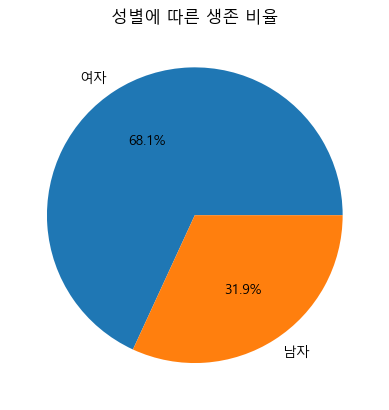

In [18]:
#전체 생존자 비율 생존자 = 1, 사망자 = 0
print(f"전체 생존자 비율 : {df['Survived'].mean()}")

# 생존자만 선택
survived = df[df['Survived'] == 1]
# 사망자만 선택
dead = df[df['Survived'] == 0]

# 생존자 중 남자 여자 비율
female_survived = survived[survived['Sex'] == 'female']
male_survived = survived[survived['Sex'] == 'male']

female_survived_ratio = len(female_survived)/len(survived)
male_survived_ratio = len(male_survived)/len(survived)

print('생존자 중 여자 생존자 비율:', female_survived_ratio)
print('생존자 중 남자 생존자 비율:', male_survived_ratio)

# Create a pie chart
plt.pie([female_survived_ratio, male_survived_ratio], labels=['여자', '남자'], autopct='%1.1f%%')
plt.title('성별에 따른 생존 비율')
plt.show()

전체 사망자 비율 : 0.6161616161616161
전체 사망자 중 여자 사망자  : 0.14754098360655737
전체 사망자 중 남자 사망자  : 0.8524590163934426


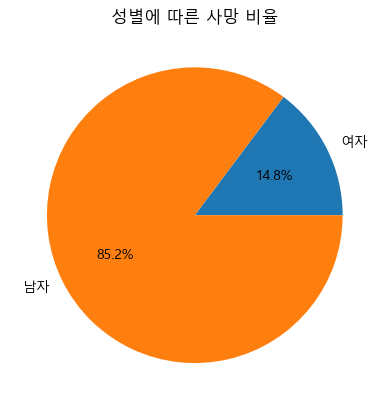

In [19]:
#전체 사망지 비율
print(f"전체 사망자 비율 : {1 - df['Survived'].mean()}")
#

female_dead = dead[dead['Sex'] == 'female']
male_dead = dead[dead['Sex'] == 'male']

female_dead_ratio = len(female_dead)/len(dead)
male_dead_ratio = len(male_dead)/len(dead)

print('전체 사망자 중 여자 사망자  :', len(female_dead)/len(dead))
print('전체 사망자 중 남자 사망자  :', len(male_dead)/len(dead))

plt.pie([female_dead_ratio,male_dead_ratio], labels=['여자', '남자'], autopct='%1.1f%%')
plt.title('성별에 따른 사망 비율')
plt.show()
